In [34]:
#Runtime of 5e5 seconds
#Imports necessary packages

#alpha=0.6
#Beta=0.8
#xc=0.1
#b=0.01

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from textwrap import wrap

In [35]:
f=open('/Users/dylanhilligoss/vh1/5e5runtime/vh1.out','r')

In [36]:
#Creates a counter to be used in the future for loop. This counter counts through the file line by line.
counter = 0

#Reads and splits lines up separately.
lines = f.readlines()
splitLine = lines[0].split('\n')
#print(splitLine)

In [37]:
dum = splitLine[0].split()
#print(dum)
a_dum = np.asarray(dum)
#print(a_dum)
f_dum = a_dum.astype(np.float)
#print(f_dum)

In [38]:
n_rad = f_dum[1].astype(np.int)
#print(n_rad.shape)
#n_time=f_dum[3].astype(np.int)
#print(n_time)

In [39]:
a_header = np.empty([101,8])
a_data = np.empty([101,n_rad,10])
#print(a_header)
#print(a_data)

In [40]:
for line in lines:
    splitLine = line.split('\n')
    dum = splitLine[0].split()
    a_dum = np.asarray(dum)
    f_dum = a_dum.astype(np.float)
    
    if (counter == 0 or counter%(n_rad+1) == 0):
        a_header[counter/(n_rad+1),:]=f_dum
        counter += 1
    else:
        a_data[(counter-(counter%(n_rad+1)))/(n_rad+1), counter%(n_rad+1)-1, :] = f_dum
        counter += 1 
for i in a_header:
    n_time=f_dum[3].astype(np.int)
f.close()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


In [41]:
rho = a_data[:,:,3]
vr = a_data[:,:,2]
r = 1.+ a_data[0,:,1]
r_grid = 1.+a_data[0,:,0]
time =a_header[:,3]
M_sun=(2e33)
yr=(365.25*24*3600)
Rstar=9.75e11
Mdotcgs=(4*np.pi*(r**2)*(Rstar**2)*rho*vr)
MdotCAK=(Mdotcgs)/(1.34e-6*M_sun/yr)
#print(Mdot)
#print(n_time.shape)

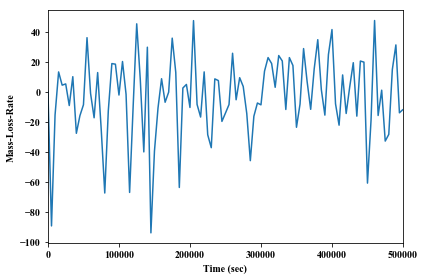

In [42]:
rho1 = a_data[:,0,3]
vr1 = a_data[:,0,2]
r1 = 1.+ a_data[0,0,1]
Mdotcgs1=(4*np.pi*(r1**2)*(Rstar**2)*rho1*vr1)
MdotCAK1=(Mdotcgs1)/(1.34e-6*M_sun/yr)
plt.plot(time,MdotCAK1)
plt.xlabel("Time (sec)")
plt.ylabel("Mass-Loss-Rate")
plt.xlim(0,5e5)
#plt.ylim(0,6)
plt.tight_layout()
plt.show()

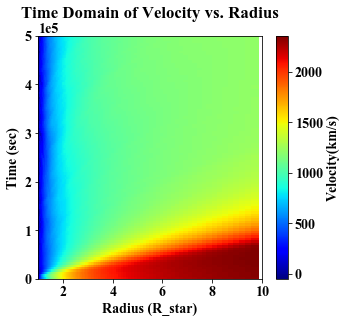

In [43]:
fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})

ax = fig.add_subplot(111)

plt.pcolor(r,time,vr/10**5,cmap='jet')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
cbar1 = plt.colorbar()
cbar1.ax.set_ylabel("Velocity(km/s)")
plt.xlim(1.0,10)
plt.ylim(0e6,.5e6)
title = ax.set_title("\n".join(wrap("Time Domain of Velocity vs. Radius", 60)))
plt.xlabel("Radius (R_star)")
plt.ylabel("Time (sec)")
title.set_y(1.05)
fig.subplots_adjust(top=0.8)
plt.show()


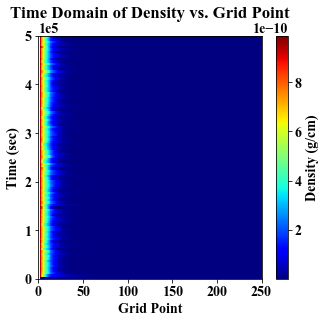

In [44]:
fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})

ax = fig.add_subplot(111)

plt.pcolormesh(r_grid,time,(rho),cmap='jet')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
cbar1 = plt.colorbar()
cbar1.ax.set_ylabel("Density (g/cm)")
plt.xlim(0,250)
#plt.ylim(0e6,.5e6)
title = ax.set_title("\n".join(wrap("Time Domain of Density vs. Grid Point", 60)))
plt.xlabel("Grid Point")
plt.ylabel("Time (sec)")
title.set_y(1.05)
fig.subplots_adjust(top=0.8)
plt.show()


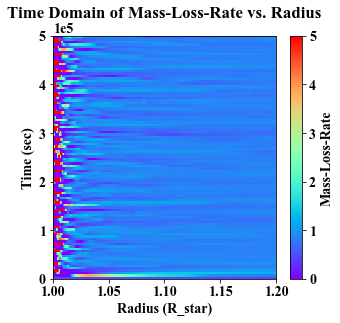

In [45]:
#M_sun=(2e33)
#yr=(365.25*24*3600)
#Mdot=((4*(np.pi)*(r)**2)*(Rstar)**2*(rho)*(vr))*(yr/(1.34e-6*M_sun))

fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})

ax = fig.add_subplot(111)

plt.pcolor((r),time,MdotCAK,cmap='rainbow',vmin=-0,vmax=5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
cbar1 = plt.colorbar()
cbar1.ax.set_ylabel("Mass-Loss-Rate")

plt.xlim(1,1.2)
plt.ylim(0e5,5e5)
title = ax.set_title("\n".join(wrap("Time Domain of Mass-Loss-Rate vs. Radius", 60)))
plt.xlabel("Radius (R_star)")
plt.ylabel("Time (sec)")
title.set_y(1.05)
fig.subplots_adjust(top=0.8)


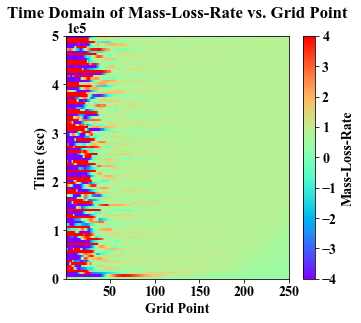

In [46]:
fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})

ax = fig.add_subplot(111)

plt.pcolor(r_grid,time,MdotCAK,cmap='rainbow',vmin=-4,vmax=4)
#plt.clim(-4,4)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
cbar1 = plt.colorbar()
cbar1.ax.set_ylabel("Mass-Loss-Rate")

plt.xlim(1,250)
plt.ylim(0e5,5e5)
title = ax.set_title("\n".join(wrap("Time Domain of Mass-Loss-Rate vs. Grid Point", 60)))
plt.xlabel("Grid Point")
plt.ylabel("Time (sec)")
title.set_y(1.05)
fig.subplots_adjust(top=0.8)
